# How does the price of books correlate to the rating of books? Does the Genre (non-fiction vs fiction) affect cost?

Information about my data

Name: Overview of Amazon’s Bestselling Books Data

Description: Data from October 2020, gathered from the GoodReads API on the most popular Amazon books from 2009 to 2019, was collected to make this sample list of the 50 most popular books. This data includes: The name of the books, the author, user rating, reviews, price, year, and genre.

In [3]:
#Import important stuff I need
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

!pip install scikit-learn
import sklearn

Books_filename = 'books.csv'
Books = pd.read_csv(Books_filename)
df = Books

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert to numeric (if needed)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=["Price", "Rating", "Genre"]

In [4]:
print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [17]:
# Initializing our X and y variables.
X = df[['User Rating']]
y = df[['Price']]

model = LinearRegression()
model.fit(X, y)

# Printing X and y variables
print(X)
print(y)

     User Rating
0            4.7
1            4.6
2            4.7
3            4.7
4            4.8
..           ...
545          4.9
546          4.7
547          4.7
548          4.7
549          4.7

[550 rows x 1 columns]
     Price
0        8
1       22
2       15
3        6
4       12
..     ...
545      8
546      8
547      8
548      8
549      8

[550 rows x 1 columns]


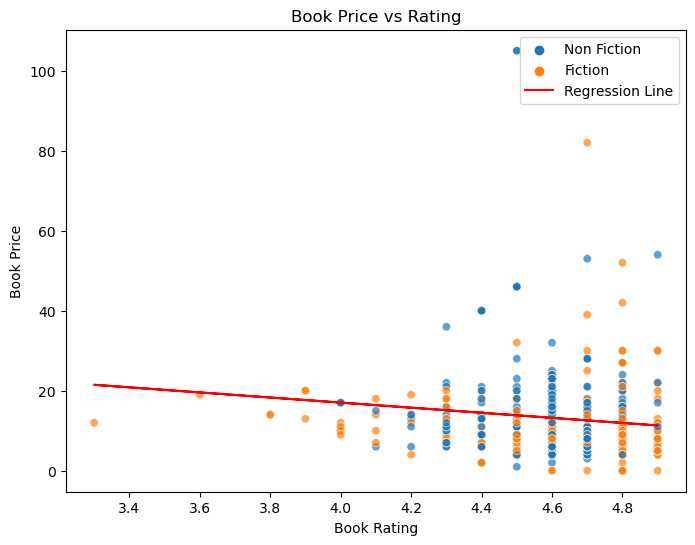

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="User Rating", y="Price", hue="Genre", data=df, alpha=0.7)
plt.plot(df["User Rating"], model.predict(X), color="red", label="Regression Line")
plt.xlabel("Book Rating")
plt.ylabel("Book Price")
plt.title("Book Price vs Rating")
plt.legend()
plt.show()

In [19]:
# Encode Genre (0 = Fiction, 1 = Non-Fiction)
le = LabelEncoder()
df["Genre_encoded"] = le.fit_transform(df["Genre"])

In [25]:
X2 = df[["User Rating", "Genre_encoded"]]
model2 = LinearRegression()
model2.fit(X2, y)

print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)


Intercept: 36.021951001447846
Coefficients: [-5.41526375  3.70399485]


In [30]:
from sklearn.metrics import r2_score
import scipy.stats as stats

# Predictions
y_pred = model.predict(X)

# R²
print("R² score:", r2_score(y, y_pred))

# Pearson correlation
r, p = stats.pearsonr(df["User Rating"], df["Price"])
print("Pearson r:", r)


R² score: 0.017711959862208748
Pearson r: -0.13308628728087996


In [29]:
from sklearn.metrics import r2_score
import scipy.stats as stats

# Predictions
y_pred = model.predict(X)

# R²
print("R² score:", r2_score(y, y_pred))

# Pearson correlation
r, p = stats.pearsonr(df["User Rating"], df["Genre_encoded"])
print("Pearson r:", r)


R² score: 0.017711959862208748
Pearson r: -0.11628240570502418


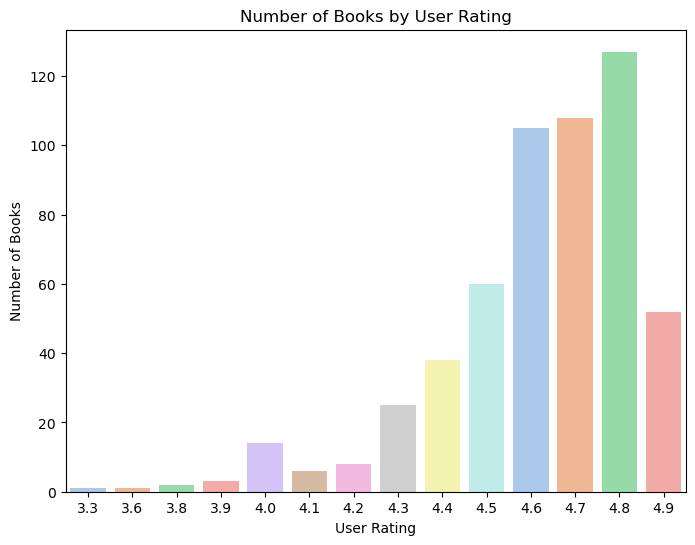

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many books for each rating
rating_counts = df["User Rating"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="pastel")

plt.xlabel("User Rating")
plt.ylabel("Number of Books")
plt.title("Number of Books by User Rating")
plt.show()


Conclusion:

There is no meaningful correlation between a book’s rating and its price, with a Pearson r rating of -0.13 and an R2 score of 0.01, indicating negligible predictive power. In other words, higher ratings do not make books more expensive. For Genre, the coefficient of 3.70 means that, on average, non-fiction books are $3.70 more than fiction books.